## [Predicting Stroke Likelihood based on Demographic, Health History, and Lifestyle Metrics]("https://www.kaggle.com/datasets/teamincribo/stroke-prediction/data")

<img src="https://media.giphy.com/media/3orieTTZVPaVNMhRra/giphy.gif" width = "600"/>

   ### Introduction:   
Our project will focus on stroke likeliness prediction using varying metrics that can assess stroke factors in a patient. [A stroke is a medical condition in which blood flow to the brain is disrupted in some way]("https://www.cdc.gov/stroke/about.htm#:~:text=A%20stroke%2C%20sometimes%20called%20a,term%20disability%2C%20or%20even%20death."). There are two ways a stroke can occur: arteries within the brain rupture (hemorrhagic) or are blocked by a blood clot (ischemic). Strokes can cause brain damage or in severe cases, death. [Stroke risk factors]("https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113") include arterial plaque buildup and hypertension. Lifestyle metrics and genetic history can also be important determinants in stroke likelihood.   
  
Through our project, we aim to answer the question *“How can we predict stroke likelihood given predictors of lifestyle, socioeconomic demographics, and health?”* 
  
We will use a synthetically generated dataset with stroke prediction metrics, called “[stroke_prediction.csv]("https://raw.githubusercontent.com/incribo-inc/stroke_prediction/main/stroke_prediction_dataset.csv")”. Each patient observation contains a range of stroke metrics and the diagnosis of stroke.  Some variables included (but are not limited to) in this data are Age, Gender, Hypertension, Heart Disease, Average Glucose Level, Body Mass Index (BMI), etc. More than 15,000 records included in this dataset, therefore there is enough standing data to use in a KNN classification algorithm for prediction.    
fy key areas for improvement with preventative health. An algorithm that can be developed on this data can also be useful for identifying high-risk populations and starting preventative health intervention early.

 ### Methods & Results
As mentioned in the introduction, the goal of our project is to determine what group of factors has the most influence on the stroke probability of an individual. Since this is a predictive question, we will be using classification to respond to it.

First, we load the necessary packages into R, including the `“kknn”` package required for our classification process.

In [1]:
# KM - Run cell before starting workspace - loads necessary packages
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
install.packages("kknn")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

We read the data set into R, renamed all columns to replace the space with `"_"` in names to be easier to work with for cleaning and wrangling, and since our data frame is too large to work with (15000 rows), and the data are not organized in a pattern throughout the data set, we sliced in half and selected all odd rows to reduce the size and so that we save time and memory when doing the project. We named this data set `stroke`.

In [2]:
#Upload and read the data file from raw github hosted source
url <- "https://raw.githubusercontent.com/incribo-inc/stroke_prediction/main/stroke_prediction_dataset.csv"
stroke <- read_csv(url)|>
rename_all(~gsub(" ", "_", .))|>
slice(seq(from = 1, to = 14999, by = 2)) #We half the dataframe because we had a really large dataset that R couldn't handle properly
stroke
nrow(stroke) #shows we now have 7500 rows which is half of 15000

Rows: 15000 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): Patient Name, Gender, Marital Status, Work Type, Residence Type, S...
dbl  (8): Patient ID, Age, Hypertension, Heart Disease, Average Glucose Leve...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Patient_ID Patient_Name      Age Gender Hypertension Heart_Disease
1    18153      Mamooty Khurana   56  Male   0            1            
2    32145      Dhanush Balan     26  Male   1            1            
3    48973      Darshit Jayaraman 51  Male   1            1            
⋮    ⋮          ⋮                 ⋮   ⋮      ⋮            ⋮            
7498 36750      Anvi Setty        79  Female 0            1            
7499 87707      Anahita Virk      47  Female 0            0            
7500 22343      Anvi Mannan       73  Male   0            0            
     Marital_Status Work_Type     Residence_Type Average_Glucose_Level ⋯
1    Married        Self-employed Rural          130.91                ⋯
2    Married        Never Worked  Rural          189.00                ⋯
3    Divorced       Self-employed Urban          177.34                ⋯
⋮    ⋮              ⋮             ⋮              ⋮                     ⋱
7498 Divorced       Private       Rural           82.69                ⋯
7499 Married        Private       Urban          107.58                ⋯
7500 Single         Self-employed Urban          169.42                ⋯
     Alcohol_Intake   Physical_Activity Stroke_History Family_History_of_Stroke
1    Social Drinker   Moderate          0              Yes                     
2    Rarely           High              0              Yes                     
3    Rarely           Low               0              Yes                     
⋮    ⋮                ⋮                 ⋮              ⋮                       
7498 Frequent Drinker Low               1              Yes                     
7499 Never            Low               1              No                      
7500 Never            High              0              Yes                     
     Dietary_Habits Stress_Levels Blood_Pressure_Levels Cholesterol_Levels
1    Vegan          3.48          140/108               HDL: 68, LDL: 133 
2    Paleo          7.31          154/97                HDL: 59, LDL: 95  
3    Pescatarian    6.84          121/95                HDL: 65, LDL: 68  
⋮    ⋮              ⋮             ⋮                     ⋮                 
7498 Vegetarian     8.69          100/99                HDL: 60, LDL: 65  
7499 Gluten-Free    1.47          155/71                HDL: 35, LDL: 183 
7500 Paleo          1.53          157/74                HDL: 79, LDL: 91  
     Symptoms                                                        Diagnosis
1    Difficulty Speaking, Headache                                   Stroke   
2    Seizures, Dizziness                                             Stroke   
3    Difficulty Speaking                                             Stroke   
⋮    ⋮                                                               ⋮        
7498 Headache, Weakness                                              No Stroke
7499 Difficulty Speaking                                             No Stroke
7500 Severe Fatigue, Numbness, Confusion, Dizziness, Loss of Balance No Stroke

[1] 7500

 #### Cleaning and Wrangling:
First we set our seed to be 1234 to maintain the same results at every run of code.
Based on our research, out of the 22 columns given in the data set for stroke status, we decided to work with the 9 that stood out for us and made us wonder if there is a strong correlation between those and stroke status. Thus, we selected the `Age`, `Gender`, `Hypertension`, `Heart_Disease`, `Alcohol_Intake`, `Physical_Activity`, `Family_History_of_Stroke`, `Dietary_Habits`, `Stress_Levels`, and of course, `Diagnosis` which is what we want to predict.
We then renamed these columns to have more concise names and only lower-case letters for easier use. We also make `diagnosis` a factor for the classification process.
Next, since we wanted to be able to work with our categorical variables such as gender, diet, etc., we factored our categorical variables as numeric. If like `family_history` and `hypertension` the values are yes or no, they are represented with 1 and 0. Other categorical variables such as gender, diet, etc. are numbered from 1 to represent different types.
We named this data frame `stroke_clean`.

In [3]:
# set seed - don't change!
set.seed(1234)

# wrangling - selects cols for prediction
stroke_selected <- stroke |>
    select(Age, Gender, Hypertension, Heart_Disease, Alcohol_Intake, 
           Physical_Activity, Family_History_of_Stroke,
           Dietary_Habits, Stress_Levels, Diagnosis)

# rename columns + make diagnosis a factor due to our classification
stroke_clean <- stroke_selected |>
    rename(age = Age,
           gender = Gender,
           hypertension = Hypertension,
           heart_disease = Heart_Disease,
           alcohol_intake = Alcohol_Intake,
           activity = Physical_Activity,
           family_history = Family_History_of_Stroke,
           diet = Dietary_Habits,
           stress = Stress_Levels,
           diagnosis = Diagnosis) |>
mutate (diagnosis = as_factor (diagnosis))

stroke_clean$alcohol_intake <- as.numeric(factor(stroke_clean$alcohol_intake,
                                           levels = c("Never", "Rarely", "Social Drinker", "Frequent Drinker"),
                                           labels = c(1, 2, 3, 4)))

stroke_clean$family_history <- as.numeric(factor(stroke_clean$family_history,
                                           levels = c("Yes", "No"),
                                           labels = c(2, 1)))

stroke_clean$activity <- as.numeric(factor(stroke_clean$activity,
                                             levels = c("Moderate", "Low", "High"),
                                             labels = c(2, 1, 3)))      

stroke_clean$gender <- as.numeric(factor(stroke_clean$gender,
                                           levels = c("Male", "Female"),
                                           labels = c(1, 2)))
stroke_clean$diet <- as.numeric(factor(stroke_clean$diet,
                                           levels = c("Vegan", "Paleo", "Pescatarian", "Vegetarian","Non-Vegetarian", "Gluten-Free", "Keto"),
                                           labels = c(1, 2, 3, 4, 5, 6,7)))
head(stroke_clean)

age gender hypertension heart_disease alcohol_intake activity family_history
1 56  1      0            1             3              1        1             
2 26  1      1            1             2              3        1             
3 51  1      1            1             2              2        1             
4 40  2      1            0             1              2        2             
5 72  2      1            1             2              3        2             
6 41  1      0            1             4              2        1             
  diet stress diagnosis
1 1    3.48   Stroke   
2 2    7.31   Stroke   
3 3    6.84   Stroke   
4 4    6.38   No Stroke
5 4    0.73   Stroke   
6 3    1.56   No Stroke

#### Visualization
We decided to visualize the only 2 continuous variables we had in our cleaned data frame, ‘age’ and ‘stress’. Thus, we decided to visualize Stress vs. Age in a Scatterplot, and color the points based on Stroke Status to examine the correlation.

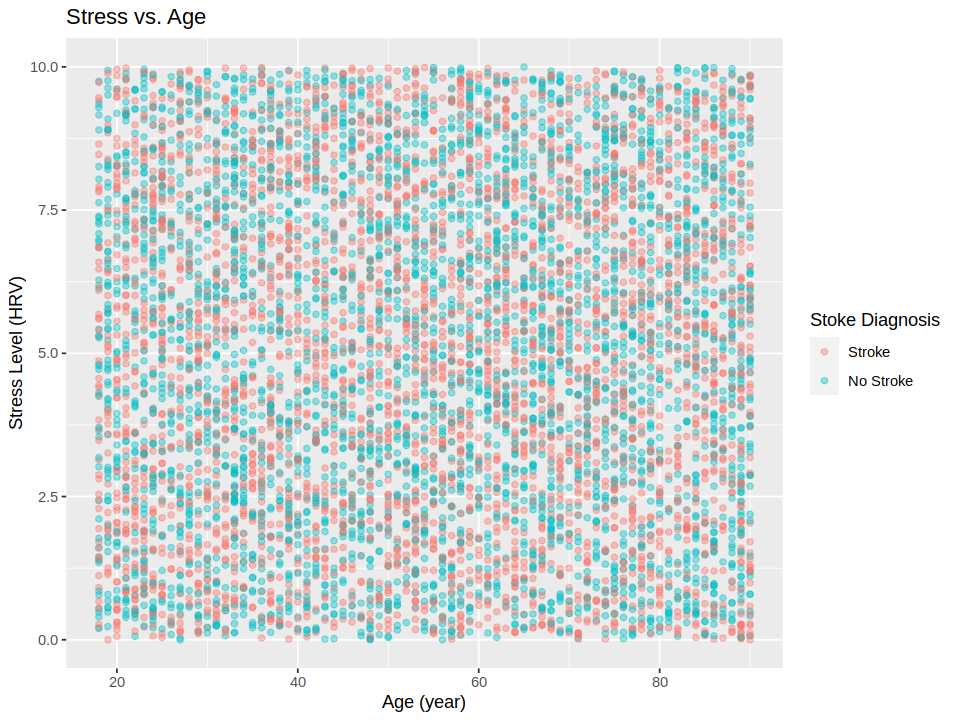

In [4]:
#Scatterplot visualization:
options(repr.plot.width = 8, repr.plot.height = 6)

stress_vs_age <- stroke_clean |>
ggplot(aes (x= age, y= stress, color = diagnosis))+
geom_point (alpha = 0.4)+
labs (x = "Age (year)", 
       y = "Stress Level (HRV)",
       color = "Stoke Diagnosis")+
ggtitle("Stress vs. Age")
stress_vs_age

Due to the high volume of data, there is not a visible pattern among them for stroke status of a person. However, we will rely on our research to proceed with stress levels and age as two of the predictors. Then we decided to group each of these with similar variables that seem like to fall under the same category. Thus, we grouped Age, Gender and Family History together as our predictive group of Demographic factors. We also grouped Stress Levels with Hypertension and Heart Disease together as our predictive group of Health Factors.

Then we visualized our three remaining variables in bar graphs to see the stroke status based on each type of variable as below:

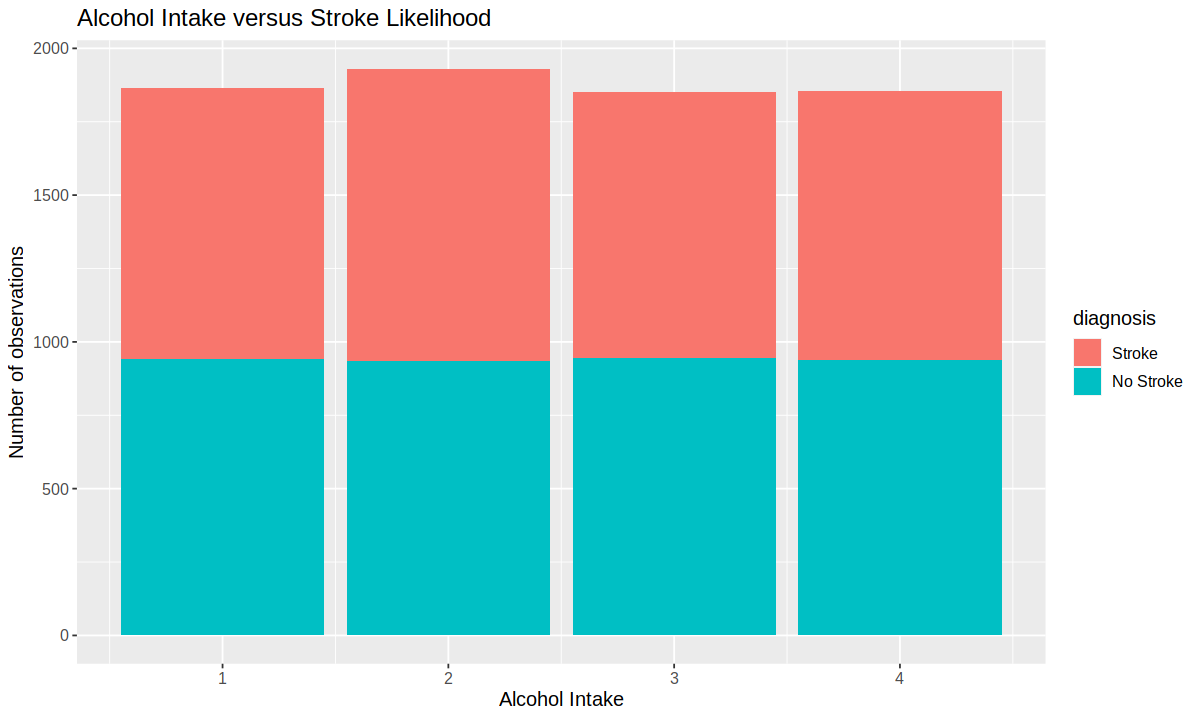

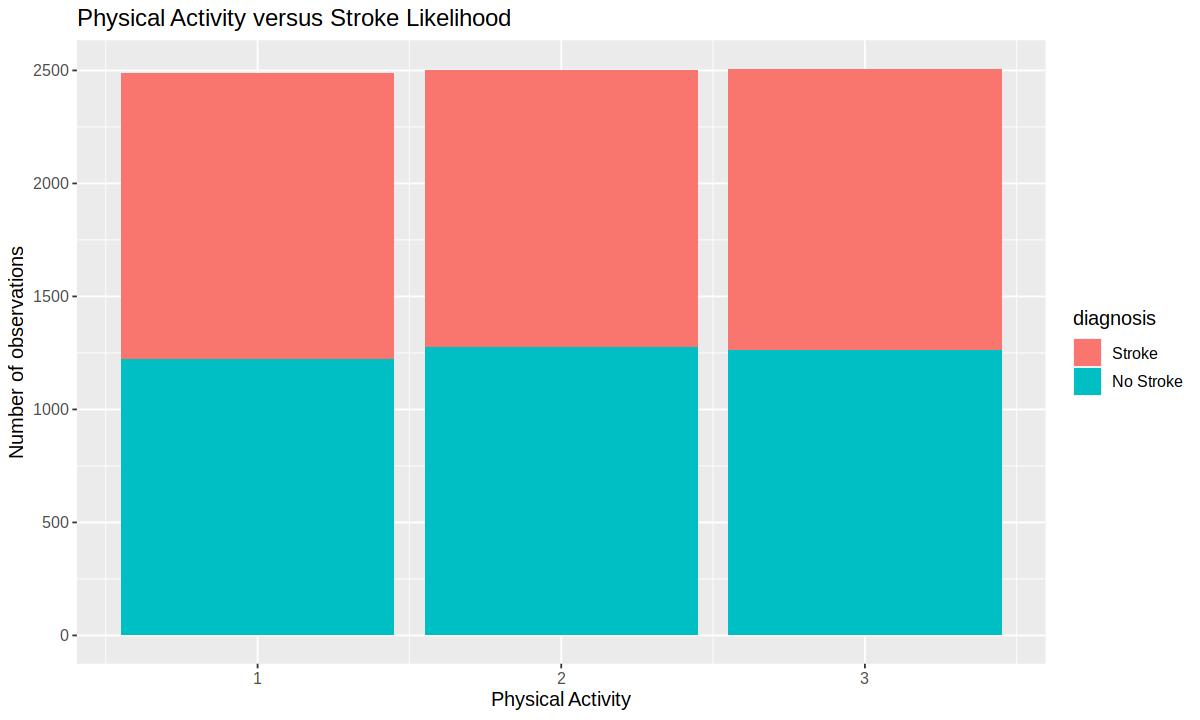

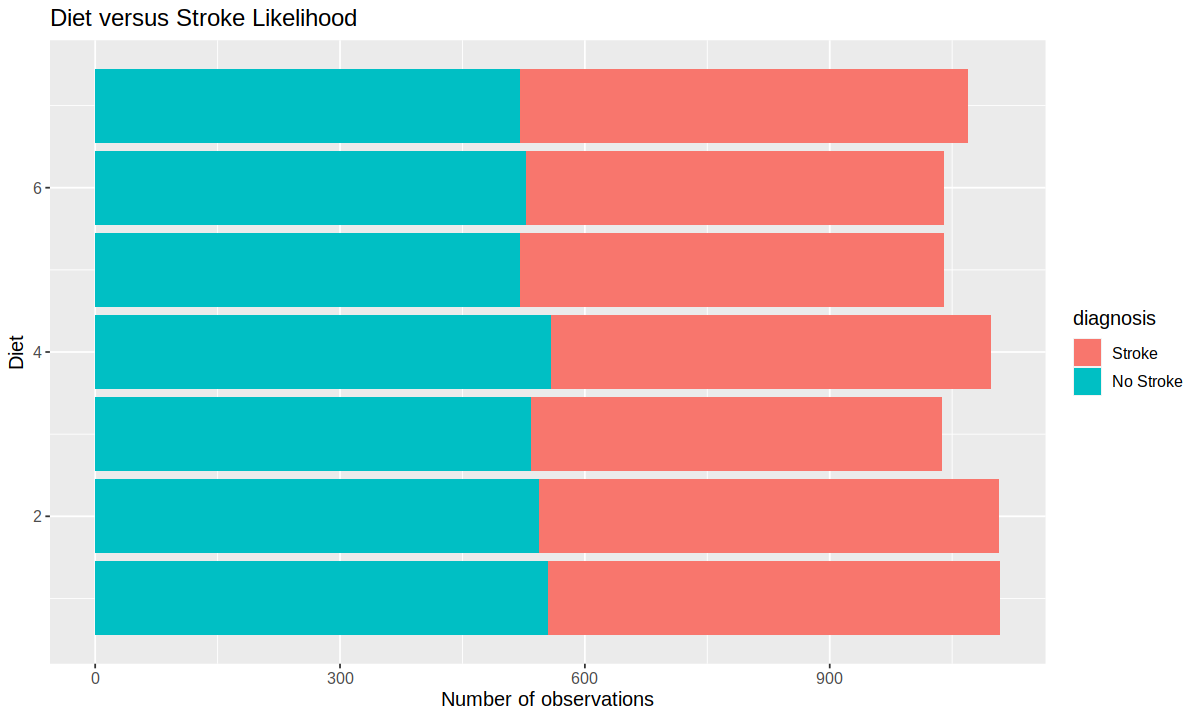

In [5]:
options(repr.plot.width = 10, repr.plot.height = 6) 

# visualize data for alcohol intake and stroke likelihood
alcohol_viz <- stroke_clean |>
    ggplot(aes(x = alcohol_intake)) +
    geom_bar(aes(fill = diagnosis)) +
    xlab("Alcohol Intake") +
    ylab("Number of observations") +
    theme(text = element_text(size=12)) +
    labs(color = "Diagnosis of stroke") +
    ggtitle("Alcohol Intake versus Stroke Likelihood")

alcohol_viz

# visualize data for physical activity and stroke likelihood
activity_viz <- stroke_clean |>
    ggplot(aes(x = activity)) +
    geom_bar(aes(fill = diagnosis)) +
    xlab("Physical Activity") +
    ylab("Number of observations") +
    theme(text = element_text(size=12)) +
    labs(color = "Diagnosis of stroke") +
    ggtitle("Physical Activity versus Stroke Likelihood")

activity_viz

# visualize data for diet and stroke likelihood
diet_viz <- stroke_clean |>
    ggplot(aes(y = diet)) +
    geom_bar(aes(fill = diagnosis)) +
    xlab("Number of observations") +
    ylab("Diet") +
    theme(text = element_text(size=12)) +
    labs(color = "Diagnosis of stroke")+
    ggtitle("Diet versus Stroke Likelihood")

diet_viz

While alcohol intake levels seems like it doesn't have much correlation with the stroke status, It is visible that more physical activity results in slightly less stroke reported. Furthermore, looking at different diets, ... seems to have the least amount of strokes reported. This creates our third group of predictors that have a common ground. We grouped Alcohol Intake, Physical Activity and Diet together as our predictive group of Lifestyle.

 #### Methods:    
We will create 3 KNN-classification prediction models using stroke metrics to predict the likelihood of a stroke. The first will use demographic predictors of age, gender and family stroke history. The second will use health predictors of heart disease, stress levels and hypertension, and the third will use lifestyle predictors of alcohol consumption, physical activity and dietary habits.   
  
We will split the dataset into a training set and testing set, and use cross-validation to determine the best K-value for each of the 3 models. Scatter plots will be used to visualize each prediction model. After training the knn-algorithm, we will evaluate the three prediction models using the testing set. We will cross-compare the three models to determine which predicts stroke likelihood with the most confidence.   
  
As a further investigation, we will use all three prediction models to evaluate a random sample patient with observations from all three predictor set metrics. This simulates a real-world application where an individual can be analyzed holistically through multiple facets. 

 #### Expected Outcomes and Significance:  
We hypothesize the health metrics category predictors will have the highest accuracy to be used as a prediction model to find out a patient's stroke history status. Literature suggests that hypertension and heart disease specifically are well-known comorbidities for stroke.

 #### Classification:
Starting the classification process, we first divide our data into training and testing sets to train our models on training set and then test for their accuracies on testing set.

In [6]:
# split data
# we are using 9 predictors, so 2/3 = 67% data used as training, 1/3 = 33% predicting
pre_split_stroke <- stroke

stroke_split <- initial_split(stroke_clean, prop = 0.67, strata = diagnosis)
stroke_train <- training(stroke_split)
stroke_test <- testing(stroke_split)

head (stroke_train)
# stroke_train

age gender hypertension heart_disease alcohol_intake activity family_history
1 41  1      0            1             4              2        1             
2 31  2      1            1             4              3        2             
3 40  2      1            1             3              2        2             
4 47  2      0            1             1              2        2             
5 72  2      0            0             4              3        2             
6 21  1      0            0             1              1        1             
  diet stress diagnosis
1 3    1.56   No Stroke
2 4    3.26   No Stroke
3 4    9.70   No Stroke
4 6    9.15   No Stroke
5 5    9.26   No Stroke
6 3    5.07   No Stroke

Now, We start creating our models, training them, and obtaining their accuracies.
### Socioeconomic Demographics KNN Classification:
#### Predictors: 
    * Age
    * Gender
    * Family Stroke History

### 1. First we perform cross-validation to obtain the best K
##### 1.1. Select the desired columns from `stroke_train` and `stroke_test`

In [7]:
#1.1
stroke_train_demographics  <- stroke_train |>
select (diagnosis, age, gender, family_history)

stroke_test_demographics  <- stroke_test |>
select (diagnosis, age, gender, family_history)

head (stroke_train_demographics)
head (stroke_test_demographics)

diagnosis age gender family_history
1 No Stroke 41  1      1             
2 No Stroke 31  2      2             
3 No Stroke 40  2      2             
4 No Stroke 47  2      2             
5 No Stroke 72  2      2             
6 No Stroke 21  1      1

diagnosis age gender family_history
1 Stroke    51  1      1             
2 No Stroke 40  2      2             
3 Stroke    42  1      2             
4 Stroke    64  2      2             
5 No Stroke 80  2      1             
6 No Stroke 71  1      2

##### 1.2. Split the `stroke_train_demographics` for cross-validation through `vfold_cv`.
##### 1.3. Create the `recipe`, include the correct `predictors` and `pre-process` the data.
##### 1.4. Create the `knn` `model`, using the appropriate engine and mode and set `neighbors = tune()`.
##### 1.5. Fit the `recipe` and `model` into the `workflow`.

In [8]:
#1.2
demographics_vfold <- vfold_cv(stroke_train_demographics, strata=diagnosis, v=5)

#1.3
demographics_recipe <- recipe (diagnosis ~ . , data= stroke_train_demographics)
demographics_recipe

#1.4
demographics_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine ("kknn") |>
    set_mode ("classification")
demographics_spec

#1.5
demographics_workflow <- workflow() |>
    add_recipe (demographics_recipe)|>
    add_model (demographics_spec)
demographics_workflow

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


6. Make a `tibble` called `k_vals` to determine the range and intervals of $K$s we want to perform the cross-validation on.
7. Used the `tune_grid` function on our train/validation splits to estimate the classifier accuracy for a range of K values, collected and filtered the `accuracy` to obtain the `accuracies` of our $K$s.
8. Plotted `accuracy` vs. `K` to visualize what would be the best $K$ with the highest accuracy estimate that doesn’t change much if you change K to a nearby value.
##### Notes to keep in mind for this section:
* We have picked the range to be from 40-80 through a series of background work:
* First we used the formula `sqrt(# of rows)/2` to roughly get an idea of what $K$ can be
* The result was 41, we made two ranges: one from 1-40 and one from 41-80 and plotted the `K` vs. `Accuracy` for both
* Obtained graphs showed the range to be used is 41-81 because that range has the maximum $K$ `accuracy`.
* The code for graph of cross validation of 1-40 and 41-59 is removed to avoid wasting memory.

neighbors .metric  .estimator mean      n std_err     .config              
1 40        accuracy binary     0.4924358 5 0.007285620 Preprocessor1_Model01
2 42        accuracy binary     0.4968175 5 0.005861273 Preprocessor1_Model02
3 44        accuracy binary     0.5002018 5 0.005891627 Preprocessor1_Model03
4 46        accuracy binary     0.4942287 5 0.003253217 Preprocessor1_Model04
5 48        accuracy binary     0.4918408 5 0.005745353 Preprocessor1_Model05
6 50        accuracy binary     0.5025875 5 0.003912344 Preprocessor1_Model06

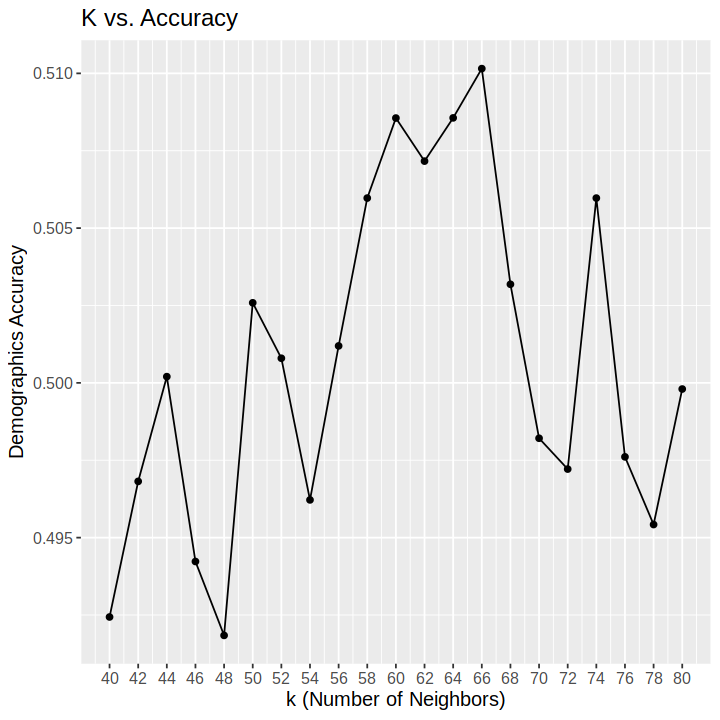

In [9]:
options(repr.plot.height = 6, repr.plot.width = 6)
#1.6
k_vals_demographics <- tibble(neighbors = seq(40,80, by=2))
#1.7
accurasies_demographics <- demographics_workflow |>
    tune_grid (resamples = demographics_vfold, grid = k_vals_demographics) |>
    collect_metrics() |>
  filter(.metric == "accuracy")
head(accurasies_demographics)
#1.8
cross_val_plot_demographics <- accurasies_demographics |>
    ggplot(aes (x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs (x = "k (Number of Neighbors)",
          y = "Demographics Accuracy",
         title = "K vs. Accuracy") +
      theme(text = element_text(size = 12))+
scale_x_continuous(breaks = seq(40, 80, by = 2)) # adjusting the x-axis
cross_val_plot_demographics

##### 1.9 As shown in the `K`Vs.`accuracy` plot, the best $K$ is $K$=66

### 2. Now that we have obtained our best `K`, we will perform `knn` on our training data with this value of `k`
##### 2.1. Create a new `knn` `model`, using the appropriate engine and mode and set `neighbors = 76` as we obtained in the cross-validation.
##### 2.2. Fit the `recipe` we made previously called`demographics_recipe`and new `model` into the `workflow`.
##### 2.3. Use the function `predict` to apply the prediction on our testing data `stroke_test_demographics`.
##### 2.4. Finally we report the accuracy of this prediction and will store this number to compare to accuracy of our `lifestyle` and `health factors` models.

In [10]:
#2.1 
demographics_final_spec <- nearest_neighbor (weight_func = "rectangular", neighbors = 66)|>
    set_engine("kknn") |>
    set_mode("classification")

#2.2
demographics_final_workflow <- workflow() |>
    add_recipe (demographics_recipe)|>
    add_model (demographics_final_spec)|>
    fit(data= stroke_train_demographics)
demographics_final_workflow

2.3
demographics_prediction <- predict(demographics_final_workflow, stroke_test_demographics)|>
    bind_cols (stroke_test_demographics)
head(demographics_prediction)

2.4
demographics_accuracy <- demographics_prediction |>
  metrics(truth = diagnosis, estimate = .pred_class) |>
  filter(.metric == "accuracy")
head(demographics_accuracy)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(66,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4460589
Best kernel: rectangular
Best k: 66

[1] 2.3

.pred_class diagnosis age gender family_history
1 Stroke      Stroke    51  1      1             
2 Stroke      No Stroke 40  2      2             
3 No Stroke   Stroke    42  1      2             
4 Stroke      Stroke    64  2      2             
5 No Stroke   No Stroke 80  2      1             
6 No Stroke   No Stroke 71  1      2

[1] 2.4

.metric  .estimator .estimate
1 accuracy binary     0.5117124

#### Socioeconomic Demographics KNN Classification Accuracy = 0.5117124

### Lifestyle KNN Classification:
#### Predictors: 
    * Alcohol Intake
    * Dietary Habits
    * Physical Activity

### 1. First we perform cross-validation to obtain the best K
##### 1.1. Select the desired columns from `stroke_train` and `stroke_test`

In [11]:
#1.1
stroke_train_lifestyle  <- stroke_train |>
select (diagnosis, alcohol_intake, diet, activity)

stroke_test_lifestyle  <- stroke_test |>
select (diagnosis, alcohol_intake, diet, activity)

head(stroke_train_lifestyle)
head(stroke_train_lifestyle)

diagnosis alcohol_intake diet activity
1 No Stroke 4              3    2       
2 No Stroke 4              4    3       
3 No Stroke 3              4    2       
4 No Stroke 1              6    2       
5 No Stroke 4              5    3       
6 No Stroke 1              3    1

diagnosis alcohol_intake diet activity
1 No Stroke 4              3    2       
2 No Stroke 4              4    3       
3 No Stroke 3              4    2       
4 No Stroke 1              6    2       
5 No Stroke 4              5    3       
6 No Stroke 1              3    1

##### 1.2. Split the `stroke_train_lifestyle` for cross-validation through `vfold_cv`.
##### 1.3. Create the `recipe`, include the correct `predictors` and `pre-process` the data.
##### 1.4. Create the `knn` `model`, using the appropriate engine and mode and set `neighbors = tune()`.
##### 1.5. Fit the `recipe` and `model` into the `workflow`.

In [12]:
#1.2
lifestyle_vfold <- vfold_cv(stroke_train_lifestyle, strata=diagnosis, v=5)

#1.3
lifestyle_recipe <- recipe (diagnosis ~ . , data= stroke_train_lifestyle)
lifestyle_recipe

#1.4
lifestyle_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine ("kknn") |>
    set_mode ("classification")
lifestyle_spec

#1.5
lifestyle_workflow <- workflow() |>
    add_recipe (lifestyle_recipe)|>
    add_model (lifestyle_spec)
lifestyle_workflow

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


##### 1.6. Make a `tibble` called `k_vals` to determine the range and intervals of $K$s we want to perform the cross-validation on.
##### 1.7. Used the `tune_grid` function on our train/validation splits to estimate the classifier accuracy for a range of K values, collected and filtered the `accuracy` to obtain the `accuracies` of our $K$s.
##### 1.8. Plotted `accuracy` vs. `K` to visualize what would be the best $K$ with the highest accuracy estimate that doesn’t change much if you change K to a nearby value.
##### Notes to keep in mind for this section:
* We have picked the range to be from 2-46 through a series of background work:
* First we used the formula `sqrt(# of rows)/2` to roughly get an idea of what $K$ can be
* The result was 41, we made two ranges: one from 1-46 and one from 46-100 and plotted the `K` vs. `Accuracy` for both
* Obtained graphs showed the range to be used is 1-46 because that range has the maximum $K$ `accuracy`.
* The code for graph of cross validation of 46-100 is removed to avoid wasting memory.

neighbors .metric  .estimator mean      n std_err      .config              
1  2        accuracy binary     0.5015924 5 9.989891e-05 Preprocessor1_Model01
2  4        accuracy binary     0.5015924 5 9.989891e-05 Preprocessor1_Model02
3  6        accuracy binary     0.5015924 5 9.989891e-05 Preprocessor1_Model03
4  8        accuracy binary     0.5015924 5 9.989891e-05 Preprocessor1_Model04
5 10        accuracy binary     0.5015924 5 9.989891e-05 Preprocessor1_Model05
6 12        accuracy binary     0.5015924 5 9.989891e-05 Preprocessor1_Model06

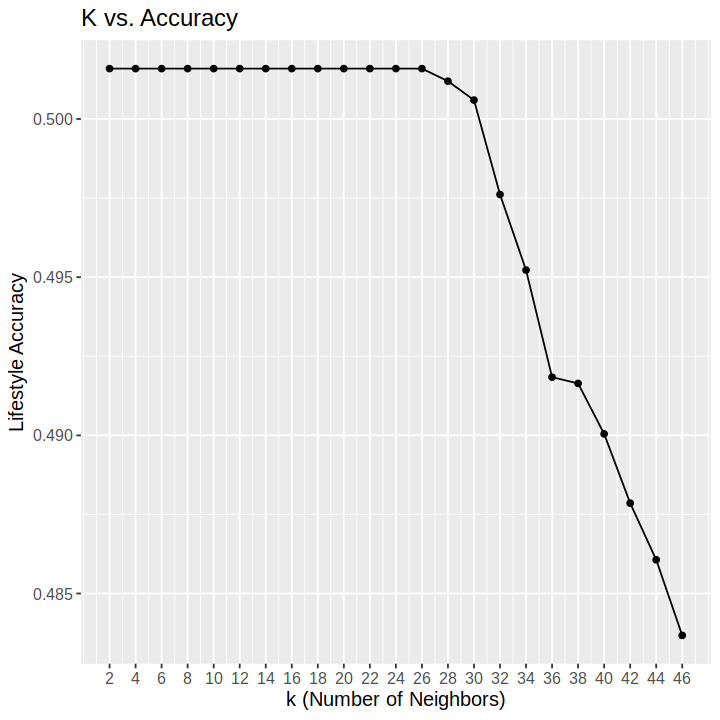

In [13]:
options(repr.plot.height = 6, repr.plot.width = 6)
#1.6
k_vals_lifestyle <- tibble(neighbors = seq(2,46, by=2))
#1.7
accurasies_lifestyle <- lifestyle_workflow |>
    tune_grid (resamples = lifestyle_vfold, grid = k_vals_lifestyle) |>
    collect_metrics() |>
  filter(.metric == "accuracy")
head(accurasies_lifestyle)
#1.8
cross_val_plot_lifestyle <- accurasies_lifestyle |>
    ggplot(aes (x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs (x = "k (Number of Neighbors)",
          y = "Lifestyle Accuracy",
         title = "K vs. Accuracy") +
      theme(text = element_text(size = 12))+
scale_x_continuous(breaks = seq(2, 46, by = 2)) # adjusting the x-axis
cross_val_plot_lifestyle

#### 1.9 As shown in the `K`Vs.`accuracy` plot, the best $K$ is $K$=2,4,6,8,10,12,14,16,18,20,22,24,26

### 2. Now that we have obtained our best `K`, we will perform `knn` on our training data with this value of `k`
##### 2.1. Create a new `knn` `model`, using the appropriate engine and mode and set `neighbors = 14` since it is the middle value between the numbers we obtained in the cross-validation.
##### 2.2. Fit the `recipe` we made previously called`demographics_recipe`and new `model` into the `workflow`.
##### 2.3. Use the function `predict` to apply the prediction on our testing data `stroke_test_demographics`.
##### 2.4. Finally we report the accuracy of this prediction and will store this number to compare to accuracy of our `lifestyle` and `health factors` models.

In [51]:
#2.1 
lifestyle_final_spec <- nearest_neighbor (weight_func = "rectangular", neighbors = 14)|>
    set_engine("kknn") |>
    set_mode("classification")
lifestyle_final_spec

#2.2
lifestyle_final_workflow <- workflow() |>
    add_recipe (lifestyle_recipe)|>
    add_model (lifestyle_final_spec)|>
    fit(data= stroke_train_lifestyle)
lifestyle_final_workflow

2.3
lifestyle_prediction <- predict(lifestyle_final_workflow, stroke_test_lifestyle)|>
    bind_cols (stroke_test_lifestyle)
head(lifestyle_prediction)

2.4
lifestyle_accuracy <- lifestyle_prediction |>
  metrics(truth = diagnosis, estimate = .pred_class) |>
  filter(.metric == "accuracy")
head (lifestyle_accuracy)

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 14
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(14,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4984076
Best kernel: rectangular
Best k: 14

[1] 2.3

.pred_class diagnosis alcohol_intake diet activity
1 No Stroke   Stroke    2              3    2       
2 No Stroke   No Stroke 1              4    2       
3 No Stroke   Stroke    4              2    2       
4 No Stroke   Stroke    4              5    1       
5 No Stroke   No Stroke 1              1    3       
6 No Stroke   No Stroke 4              3    1

[1] 2.4

.metric  .estimator .estimate
1 accuracy binary     0.5016155

#### Lifestyle KNN Classification Accuracy = 0.5016155

### Health KNN Classification:
#### Predictors: 
    * Hypertension
    * Heart Disease
    * Stress Levels

### 1. First we perform cross-validation to obtain the best K
##### 1.1. Select the desired columns from `stroke_train` and `stroke_test`

In [52]:
#1.1
stroke_train_health  <- stroke_train |>
select (diagnosis, 	hypertension, heart_disease, stress)

stroke_test_health  <- stroke_test |>
select (diagnosis, 	hypertension, heart_disease, stress)

head (stroke_train_health)
head (stroke_test_health)

diagnosis hypertension heart_disease stress
4  No Stroke 0            0             5.35  
10 No Stroke 0            0             8.39  
11 No Stroke 0            1             1.56  
14 No Stroke 0            0             4.14  
22 No Stroke 0            0             5.65  
24 No Stroke 0            1             8.40

diagnosis hypertension heart_disease stress
2  Stroke    0            0             1.73  
3  Stroke    1            1             7.31  
5  Stroke    1            1             6.84  
7  No Stroke 1            0             6.38  
8  Stroke    0            1             5.85  
12 Stroke    0            0             8.71

##### 1.2. Split the `stroke_train_lifestyle` for cross-validation through `vfold_cv`.
##### 1.3. Create the `recipe`, include the correct `predictors` and `pre-process` the data.
##### 1.4. Create the `knn` `model`, using the appropriate engine and mode and set `neighbors = tune()`.
##### 1.5. Fit the `recipe` and `model` into the `workflow`.

In [16]:
#1.2
health_vfold <- vfold_cv(stroke_train_health, strata=diagnosis, v=5)

#1.3
health_recipe <- recipe (diagnosis ~ . , data= stroke_train_health)
health_recipe

#1.4
health_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine ("kknn") |>
    set_mode ("classification")
health_spec

#1.5
health_workflow <- workflow() |>
    add_recipe (health_recipe)|>
    add_model (health_spec)
health_workflow

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


##### 1.6. Make a `tibble` called `k_vals` to determine the range and intervals of $K$s we want to perform the cross-validation on.
##### 1.7. Used the `tune_grid` function on our train/validation splits to estimate the classifier accuracy for a range of K values, collected and filtered the `accuracy` to obtain the `accuracies` of our $K$s.
##### 1.8. Plotted `accuracy` vs. `K` to visualize what would be the best $K$ with the highest accuracy estimate that doesn’t change much if you change K to a nearby value.
##### Notes to keep in mind for this section:
* We have picked the range to be from 2-42 through a series of background work:
* First we used the formula `sqrt(# of rows)/2` to roughly get an idea of what $K$ can be
* The result was 41, we made two ranges: one from 2-42 and one from 42-100 and plotted the `K` vs. `Accuracy` for both
* Obtained graphs showed the range to be used is 2-46 because that range has the maximum $K$ `accuracy`.
* The code for graph of cross validation of 42-100 is removed to avoid wasting memory.

neighbors .metric  .estimator mean      n std_err     .config              
1  90       accuracy binary     0.5037823 5 0.009012603 Preprocessor1_Model01
2  92       accuracy binary     0.5049751 5 0.007796831 Preprocessor1_Model02
3  94       accuracy binary     0.5011922 5 0.009187111 Preprocessor1_Model03
4  96       accuracy binary     0.5033831 5 0.008117842 Preprocessor1_Model04
5  98       accuracy binary     0.5077618 5 0.008353977 Preprocessor1_Model05
6 100       accuracy binary     0.5103502 5 0.006077770 Preprocessor1_Model06

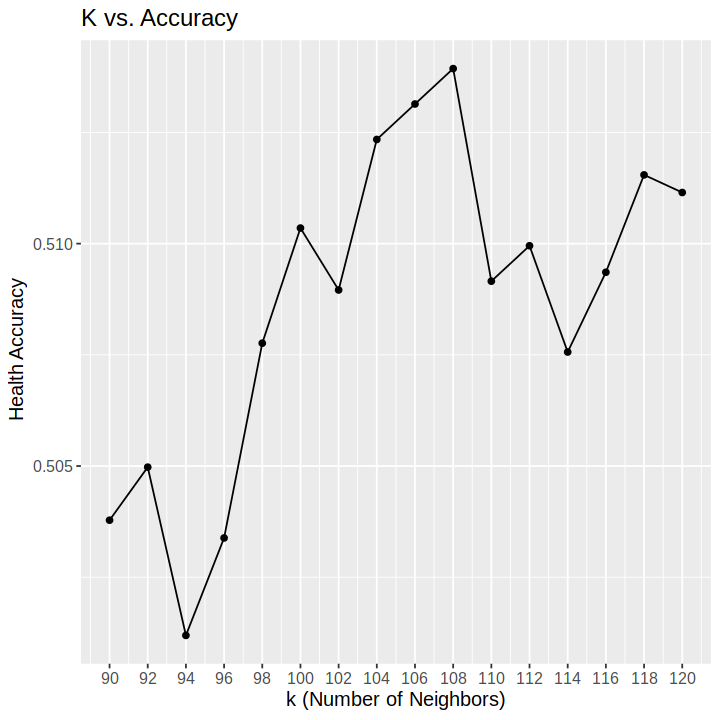

In [17]:
options(repr.plot.height = 6, repr.plot.width = 6)
#1.6
k_vals_health <- tibble(neighbors = seq(90,120, by=2))
#1.7
accurasies_health <- health_workflow |>
    tune_grid (resamples = health_vfold, grid = k_vals_health) |>
    collect_metrics() |>
  filter(.metric == "accuracy")
head (accurasies_health)
#1.8
cross_val_plot_health <- accurasies_health |>
    ggplot(aes (x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs (x = "k (Number of Neighbors)",
          y = " Health Accuracy",
         title = "K vs. Accuracy") +
      theme(text = element_text(size = 12))+
scale_x_continuous(breaks = seq(90, 120, by = 2)) # adjusting the x-axis
cross_val_plot_health

##### 1.9 As shown in the `K`Vs.`accuracy` plot, the best $K$ is $K$=108

### 2. Now that we have obtained our best `K`, we will perform `knn` on our training data with this value of `k`
##### 2.1. Create a new `knn` `model`, using the appropriate engine and mode and set `neighbors = 76` as we obtained in the cross-validation.
##### 2.2. Fit the `recipe` we made previously called`demographics_recipe`and new `model` into the `workflow`.
##### 2.3. Use the function `predict` to apply the prediction on our testing data `stroke_test_demographics`.
##### 2.4. Finally we report the accuracy of this prediction and will store this number to compare to accuracy of our `lifestyle` and `health factors` models.

In [46]:
#2.1 
health_final_spec <- nearest_neighbor (weight_func = "rectangular", neighbors = 108)|>
    set_engine("kknn") |>
    set_mode("classification")
health_final_spec

#2.2
health_final_workflow <- workflow() |>
    add_recipe (health_recipe)|>
    add_model (health_final_spec)|>
    fit(data= stroke_train_health)
health_final_workflow

2.3
health_prediction <- predict(health_final_workflow, stroke_test_health)|>
    bind_cols (stroke_test_health)
head (health_prediction)

2.4
health_accuracy <- health_prediction |>
  metrics(truth = diagnosis, estimate = .pred_class) |>
  filter(.metric == "accuracy")
head (health_accuracy)

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 108
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(108,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4767118
Best kernel: rectangular
Best k: 108

[1] 2.3

.pred_class diagnosis hypertension heart_disease stress
1 No Stroke   Stroke    1            1             6.84  
2 No Stroke   No Stroke 1            0             6.38  
3 No Stroke   Stroke    0            1             2.58  
4 Stroke      Stroke    1            1             2.27  
5 No Stroke   No Stroke 0            1             9.56  
6 No Stroke   No Stroke 0            1             9.80

[1] 2.4

.metric  .estimator .estimate
1 accuracy binary     0.5145396

#### Health KNN Classification Accuracy = 0.5145396

### Choose the best predictor set
#### Now that we are done doing the classification of all three prediction factors of Demographics, Lifestyle, and Health, we will compare their accuracies:

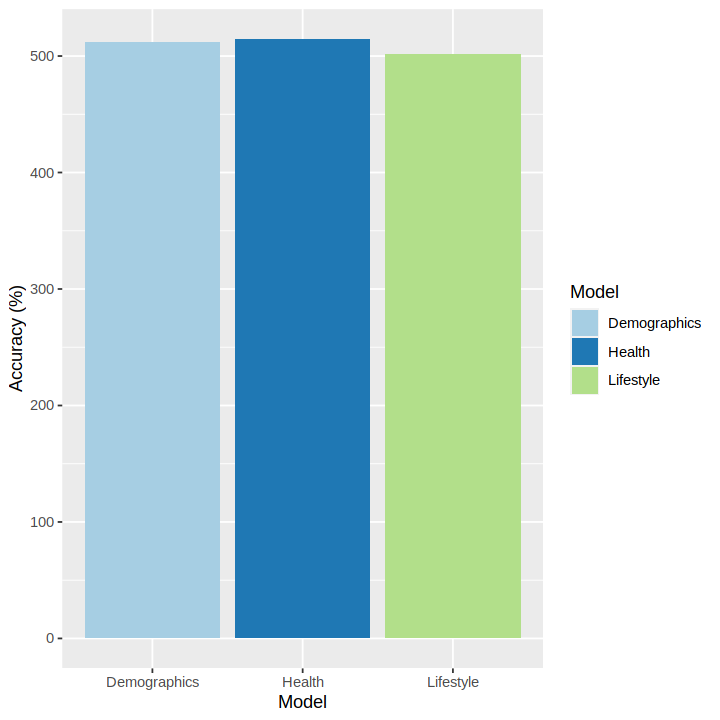

In [55]:
options(repr.plot.height = 6, repr.plot.width = 6)
#select only the accuracies column
demographics_accuracy <- demographics_accuracy |>
select (.estimate)
lifestyle_accuracy <- lifestyle_accuracy |>
select (.estimate)
health_accuracy <- health_accuracy |>
select (.estimate)

#Create a tibble of accuracies of 3 models
accuracies_comparison <- tibble (model = c("Demographics", "Lifestyle", "Health"),
                                 accuracy = c(demographics_accuracy, lifestyle_accuracy, health_accuracy))

#visualize the comparison of 3 model's accuracies
model_comparison_plot <- accuracies_comparison |>
ggplot (aes(x = model, y = as.numeric(accuracy) * 1000, fill = model)) +
geom_bar (stat = "identity") +
labs (x = "Model", y = "Accuracy (%)", fill = "Model") +
scale_fill_brewer (palette = "Paired" )

model_comparison_plot

#### As you can see, the health predictor's model has a slightly higher accuracy than the other two models. Thus, we can conclude that the health factors of Hypertension, Stress Levels and Heart Disease history have the most influence in a person's stroke likelihood. These results are teh same as what we expected based on our relevant text research. After health, Lifestyle seems to have a higher accuracy than Lifestyle as we can see. However, all these differences are so little that...?

<img src="https://vitals.sutterhealth.org/files/2020/05/iStock-1168179082.jpg" width = "600"/>

#### As an extention for our project, we will take 2 more stepst further:
1. We will use now use all three models we have made to determine the stroke status of our random person chosen from the testing set based on their profile:
2.  We will use now use the most accurate model we made, Health factors model, to determine the stroke status of our random patient generated based on their profile. We asked R to create our random patient using the functions `sample`, `runif`, and `generate_random_profile()`

In [107]:
set.seed (18)
# 1.1. Generate a random row index
random_row_index <- sample(nrow(stroke_clean), 1)

# 1.2. Select the random row
random_row <- stroke_clean[random_row_index, ]
random_row

random_data <- random_row |> 
    select (-diagnosis)
random_data

age gender hypertension heart_disease alcohol_intake activity family_history
1 83  2      1            0             3              3        2             
  diet stress diagnosis
1 1    1.14   Stroke

age gender hypertension heart_disease alcohol_intake activity family_history
1 83  2      1            0             3              3        2             
  diet stress
1 1    1.14

In [115]:
#Now, we will predict the stroke status with all three models:
#1.
random_demographics <- predict (demographics_final_workflow, random_data)
#2.
random_lifestyle <- predict (lifestyle_final_workflow, random_data)
#3.
random_health <- predict (health_final_workflow, random_data)
random_status <- random_row |>
    select (diagnosis)

random_comparison <- tibble (Model = c("Demographics", "Lifestyle", "Health", "Real status"),
                                 Status = c(random_demographics, random_lifestyle, random_health, random_status))
random_comparison$Status <- ifelse(random_comparison$Status == 1, "Stroke", "No Stroke")
random_comparison

Model        Status   
1 Demographics Stroke   
2 Lifestyle    No Stroke
3 Health       Stroke   
4 Real status  Stroke

#### As we can see, the health predictor predicted the status correctly and the lifestyle with the least accuracy predicted the status incorrectly, showing the reliability of our health model.
#### Lastly, we perform the prediction on a random patient we generated to demonstrate real life application of our project:

In [116]:
set.seed (2323)

generate_random_profile <- function() {
  profile <- tibble(
    age = sample(1:98, 1),
    gender = sample(1:2, 1),
    hypertension = sample(0:1, 1),
    heart_disease = sample(0:1, 1),
    alcohol_intake = sample(1:4, 1),
    activity = sample(1:3, 1),
    family_history = sample(0:1, 1),
    diet = sample(1:7, 1),
    stress = runif(1, 0, 9))
  return(profile)}
hiva <- generate_random_profile()
hiva

age gender hypertension heart_disease alcohol_intake activity family_history
1 45  2      0            1             3              2        1             
  diet stress  
1 5    2.572181

#### Here is our patient Hiva, according to the random patient generator:
Hiva, a 45-year-old female, maintains an active lifestyle with a moderate level of physical activity, presenting a nuanced health profile. Despite being diagnosed with heart disease and practicing social drinking, Hiva manages to keep hypertension at bay. Her non-vegetarian dietary habits add diversity to her nutritional choices. Notably, a family history of stroke contributes to her health narrative. With stress levels quantified at 2.57, addressing psychosocial well-being becomes crucial. Considering these factors, the comprehensive nature of Hiva's profile suggests a need for personalized health interventions and vigilant monitoring. My prediction, based on the provided information, leans towards a potential stroke risk, given the interplay of cardiovascular factors and familial predisposition, but a definitive assessment could rely on the outcomes of our kknn model and professional medical evaluation.
#### Here is Hiva's image below
<img src="https://i.pinimg.com/564x/d8/6b/83/d86b8372affa9de3db3e1a27cdf92afe.jpg" width = "200"/>

#### Hiva's stroke prediction:
1. Demographics Factors
2. Lifestyle Factors
3. Health Factors

In [118]:
#1.
hiva_health <- predict (health_final_workflow, hiva)
hiva_health

.pred_class
1 No Stroke

#### According to our prediction, it is unlikely for Hiva to have stroke, given her profile.

## Discussion
##### [Write explanations of the findings]

##### These findings can be essential in clinical and public health applications. By creating a model that assesses predictors of stroke metrics, public health officials can identify key areas for improvement with preventative health. An algorithm that can be developed on this data can also be useful for identifying high-risk populations and starting preventative health intervention early.  

##### A future question that can be addressed following this algorithm if there other demographic, health, or lifestyle factors that were not considered in this study but might also influence stroke risk?

## Sources
* Dataset: https://www.kaggle.com/datasets/teamincribo/stroke-prediction/data
* Gif: https://media.giphy.com/media/3orieTTZVPaVNMhRra/giphy.gif
* Stroke Image: https://vitals.sutterhealth.org/files/2020/05/iStock-1168179082.jpg
* Stroke background information: https://www.cdc.gov/stroke/about.htm#:~:text=A%20stroke%2C%20sometimes%20called%20a,term%20disability%2C%20or%20even%20death.